# Explorations

## Import packages and load data

### Packages

In [1]:
import pandas as pd
from pathlib import Path
from stopwords_loader import *

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 22})

### Lexicons and corpus

In [2]:
anew_lexicon_path = Path('..', 'lexicon', 'ANEW2017', 'ANEW2017All.txt')
anew_lexicon = pd.read_csv(anew_lexicon_path, sep='\t')
anew_lexicon_list = anew_lexicon.Word.to_list()


In [3]:
nrc_lexicon_path = Path('..', 'lexicon', 'NRC-VAD-Lexicon-Aug2018Release', 'NRC-VAD-Lexicon.txt')
nrc_lexicon = pd.read_csv(nrc_lexicon_path, sep='\t', names=['Word', 'Valence', 'Arousal', 'Dominance'])
nrc_lexicon_list = nrc_lexicon.Word.to_list()

In [4]:
len(set(nrc_lexicon_list).intersection(set(anew_lexicon_list)))

3094

In [5]:
data_df = pd.read_csv('../data/tweets/ExtractedTweets.csv')
data_df.head(3)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...


In [6]:
text_list = data_df.Tweet.to_list()

### Stopwords

In [13]:
procedural_words = load_procedural_words()
nltk_stopwords = load_nltk_stopwords()
ordinal_cardinal_words = load_number_words()

The names of months, weekdays, human names, cities, states, and counties will be removed only when the first letter is capital

## Lexicons and stopwords exploration

In [14]:
print("The numbers of NRC / ANEW lexicons")
print(len(nrc_lexicon),
      '\n',
      len(anew_lexicon))

The numbers of NRC / ANEW lexicons
19971 
 3188


In [15]:
def plot_lexicon_hist(lexicon_df, val_col, aro_col, dom_col, bins=8, min=1, max=9, xlabel_rot=None):
      if xlabel_rot is None:
            xlabel_rot = 0
      fig, axs = plt.subplots(1, 3, figsize=(21,7))
      axs = axs.ravel()
      mapping_dict = {
            'Valence': val_col,
            'Arousal': aro_col,
            'Dominance': dom_col
      }
      for i, d in enumerate(mapping_dict.keys()):
            lexicon_df[mapping_dict[d]].hist(bins=bins, ax=axs[i], histtype='bar', ec='black', grid=False)
            axs[i].set_title(d, fontsize=22)
            axs[i].tick_params(axis='both', which='major', labelsize=14)
            axs[i].set_xticks(np.linspace(min,max,bins+1))
            axs[i].tick_params('x', labelrotation=xlabel_rot)
            axs[i].set_xlabel('Score', fontsize=16)
            axs[i].set_ylabel('Count', fontsize=16)
            # axs[i].set_xticks()
      # plt.tight_layout()

      plt.show()

ANEW


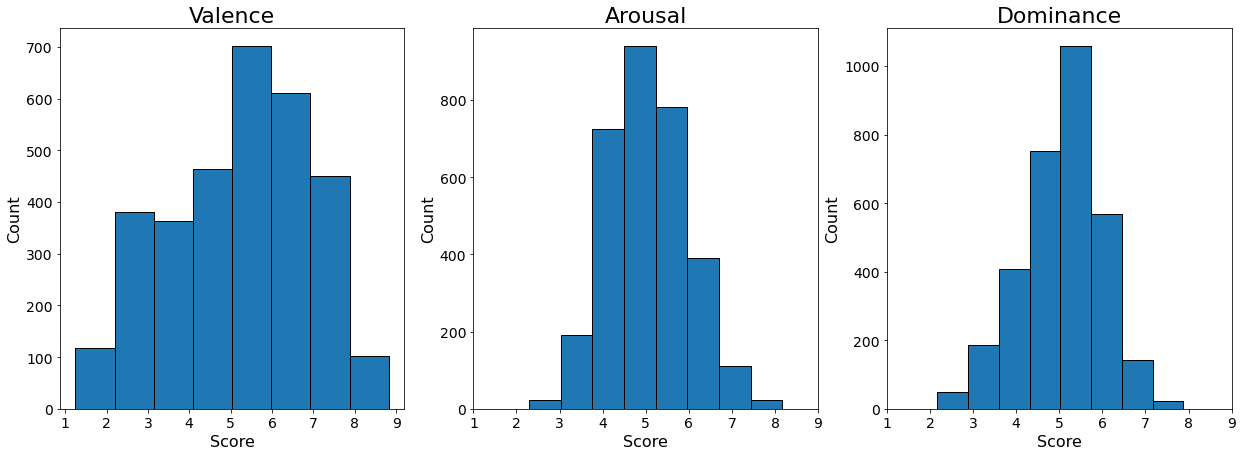

In [16]:
# %matplotlib inline
print("ANEW")
plot_lexicon_hist(anew_lexicon, 'ValMn', 'AroMn', 'DomMn')

NRC


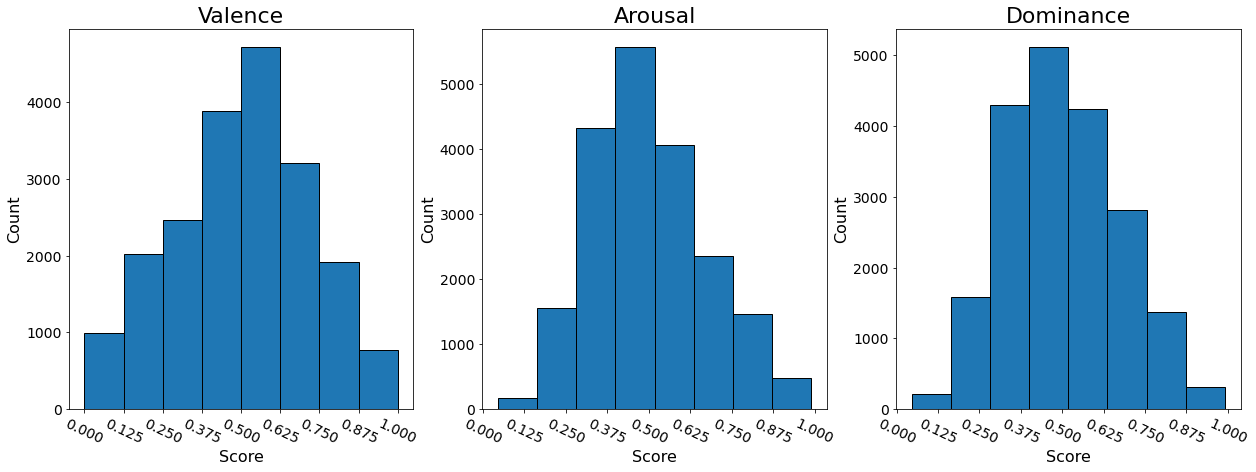

In [17]:
%matplotlib inline
print("NRC")
plot_lexicon_hist(nrc_lexicon, 'Valence', 'Arousal', 'Dominance', bins=8, min=0, max=1, xlabel_rot=-25)

In [18]:
print("Overlapping between NLTK stopwords and NRC / ANEW lexicons")
print(set(nltk_stopwords).intersection(set(nrc_lexicon)),
      '\n',
      set(nltk_stopwords).intersection(set(anew_lexicon)))

Overlapping between NLTK stopwords and NRC / ANEW lexicons
set() 
 set()


In [19]:
print("Overlapping between procedural words and NRC / ANEW lexicons")
print(set(procedural_words).intersection(set(nrc_lexicon)),
      '\n',
      set(procedural_words).intersection(set(anew_lexicon)))

Overlapping between procedural words and NRC / ANEW lexicons
set() 
 set()


In [20]:
print("Overlapping between ordinal and cardinal number words and NRC / ANEW lexicons")
print(set(ordinal_cardinal_words).intersection(set(nrc_lexicon)),
      '\n',
      set(ordinal_cardinal_words).intersection(set(anew_lexicon)))

Overlapping between ordinal and cardinal number words and NRC / ANEW lexicons
set() 
 set()


**Although the NRC lexicon has more data, ANEW might be more suitable for political text.**

## Data exploration

In [21]:
len(data_df)

86460

In [22]:
data_df.groupby('Party').count().Tweet

Party
Democrat      42068
Republican    44392
Name: Tweet, dtype: int64

In [23]:
data_df[data_df.Party=='Democrat'].groupby('Handle').count().Tweet.describe()

count    211.000000
mean     199.374408
std        8.262198
min       80.000000
25%      200.000000
50%      200.000000
75%      200.000000
max      200.000000
Name: Tweet, dtype: float64

In [24]:
data_df[data_df.Party=='Republican'].groupby('Handle').count().Tweet.describe()

count    222.000000
mean     199.963964
std        0.249086
min      197.000000
25%      200.000000
50%      200.000000
75%      200.000000
max      200.000000
Name: Tweet, dtype: float64